# Dates and times

In [1]:
import pandas as pd
import seaborn as sns
# pip install vega_datasets
from vega_datasets import local_data
import matplotlib.pyplot as plt

seattle = local_data.seattle_weather()
seattle.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [2]:
date = pd.to_datetime('8th sep, 2019 11:15 AM')
date

Timestamp('2019-09-08 11:15:00')

In [3]:
date.hour

11

In [4]:
date.minute

15

In [5]:
date = pd.to_datetime('8th sep, 2019 11:15 AM').tz_localize('US/Pacific')
date

Timestamp('2019-09-08 11:15:00-0700', tz='US/Pacific')

In [6]:
seattle.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

## `dt` accessor


In [7]:
# See common ones at https://www.mkanalysis.com/tutorial/23#Here-are-some-of-the-more-common-dt-accessors
# See all in documentation (https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.dayofyear.html)
seattle['date'].dt.day.head()

0    1
1    2
2    3
3    4
4    5
Name: date, dtype: int64

In [8]:
seattle['month'] = seattle['date'].dt.month
seattle['month'].head()

0    1
1    1
2    1
3    1
4    1
Name: month, dtype: int64

In [9]:
seattle['month_name'] = seattle['date'].dt.month_name()
seattle['month_name'].head()

0    January
1    January
2    January
3    January
4    January
Name: month_name, dtype: object

In [10]:
seattle['date'].max()

Timestamp('2015-12-31 00:00:00')

In [11]:
seattle['date'].dt.to_period('M').max()

Period('2015-12', 'M')

In [12]:
type((seattle['date'].max() - seattle['date'].min()))

pandas._libs.tslibs.timedeltas.Timedelta

In [13]:
monthly_precip = seattle.groupby(['month','month_name']).mean()[['precipitation']].reset_index()
monthly_precip

,month,month_name,precipitation
0,1,January,3.758065
1,2,February,3.734513
2,3,March,4.888710
3,4,April,3.128333
4,5,May,1.673387
5,6,June,1.107500
6,7,July,0.388710
7,8,August,1.320161
8,9,September,1.962500
9,10,October,4.059677


## Plotting time series data

Text(0.5, 1.0, 'Average precipitation by month')

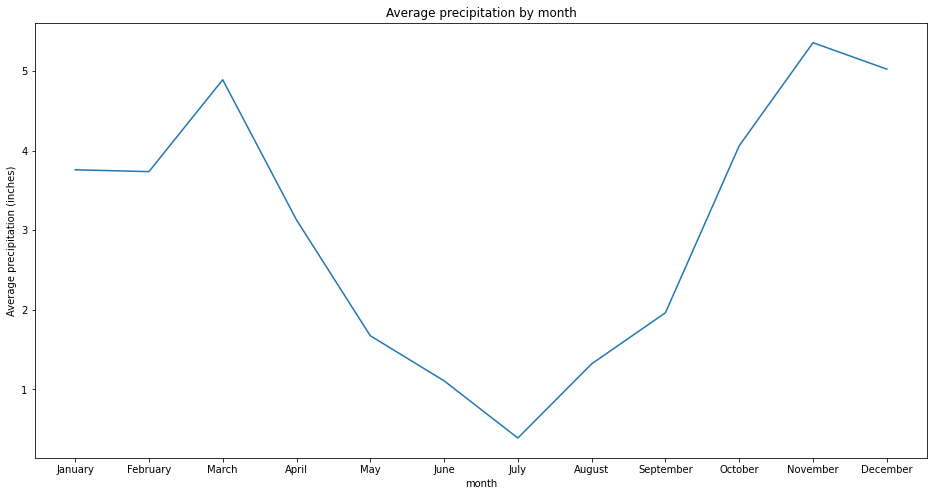

In [14]:
plt.figure(figsize = (16, 8))
sns.lineplot(x='month_name', y='precipitation', data=monthly_precip)

plt.xlabel('month')
plt.ylabel('Average precipitation (inches)')
plt.title('Average precipitation by month')

# Resampling

In [15]:
seattle.set_index(['date'], inplace=True)
seattle

,precipitation,temp_max,temp_min,wind,weather,month,month_name
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,January
2012-01-02,10.9,10.6,2.8,4.5,rain,1,January
2012-01-03,0.8,11.7,7.2,2.3,rain,1,January
2012-01-04,20.3,12.2,5.6,4.7,rain,1,January
2012-01-05,1.3,8.9,2.8,6.1,rain,1,January
...,...,...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog,12,December
2015-12-28,1.5,5.0,1.7,1.3,fog,12,December
2015-12-29,0.0,7.2,0.6,2.6,fog,12,December


## Upsampling increases the sampling rate
### From every day to every hour...

In [16]:
seattle['temp_min'].resample('H').ffill()

date
2012-01-01 00:00:00    5.0
2012-01-01 01:00:00    5.0
2012-01-01 02:00:00    5.0
2012-01-01 03:00:00    5.0
2012-01-01 04:00:00    5.0
                      ... 
2015-12-30 20:00:00   -1.0
2015-12-30 21:00:00   -1.0
2015-12-30 22:00:00   -1.0
2015-12-30 23:00:00   -1.0
2015-12-31 00:00:00   -2.1
Freq: H, Name: temp_min, Length: 35041, dtype: float64

<AxesSubplot:xlabel='date', ylabel='precipitation'>

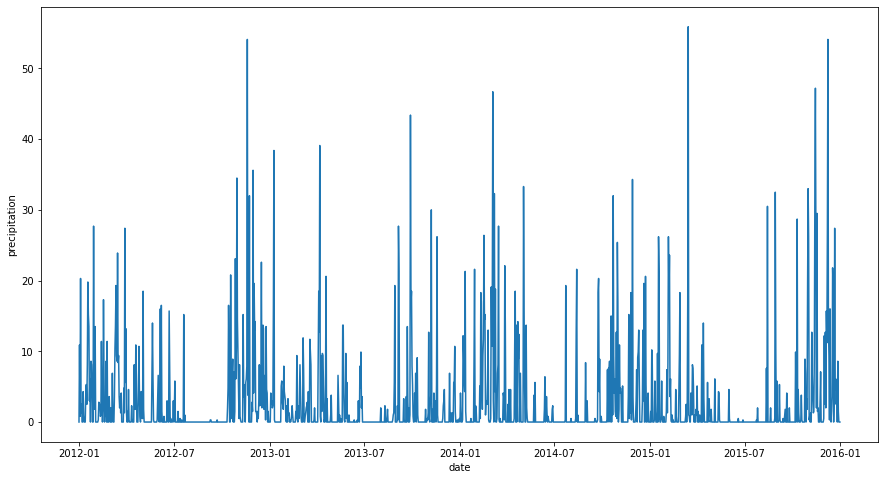

In [17]:
plt.figure(figsize = (15, 8))
sns.lineplot(x=seattle.index, y='precipitation', data=seattle)

## Downsampling descreases the sampling rate
### From week to every month...

In [18]:
biweekly_precip = seattle['precipitation'].resample('2W').mean()
biweekly_precip.head()

date
2012-01-01    0.000000
2012-01-15    3.607143
2012-01-29    8.385714
2012-02-12    2.057143
2012-02-26    4.607143
Freq: 2W-SUN, Name: precipitation, dtype: float64

<AxesSubplot:xlabel='date'>

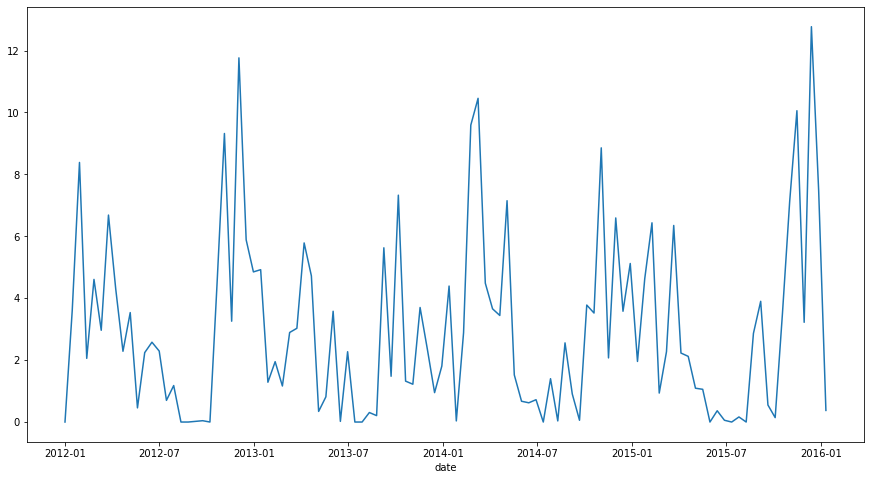

In [19]:
plt.figure(figsize = (15,8))
sns.lineplot(x=biweekly_precip.index, y=biweekly_precip.values, data=biweekly_precip)

In [20]:
low_temps_monthly = seattle['temp_min'].resample('M').min()
low_temps_monthly.head()

date
2012-01-31   -3.3
2012-02-29   -2.2
2012-03-31   -1.7
2012-04-30    1.7
2012-05-31    3.9
Freq: M, Name: temp_min, dtype: float64

In [36]:
# Get the first of the month
# Get all the "Offset aliases" here: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
seattle['temp_max'].resample('MS').first()

date
2012-01-01    10.6
2012-02-01     8.9
2012-03-01     6.1
2012-04-01     8.9
2012-05-01    11.7
2012-06-01    20.0
2012-07-01    20.0
2012-08-01    23.9
2012-09-01    21.7
2012-10-01    23.3
2012-11-01    15.0
2012-12-01    13.3
2013-01-01     5.0
2013-02-01    11.7
2013-03-01    15.0
2013-04-01    17.2
2013-05-01    18.3
2013-06-01    22.8
2013-07-01    31.7
2013-08-01    20.6
2013-09-01    27.8
2013-10-01    14.4
2013-11-01    17.8
2013-12-01    13.3
2014-01-01     7.2
2014-02-01     7.8
2014-03-01     7.2
2014-04-01    14.4
2014-05-01    29.4
2014-06-01    22.2
2014-07-01    34.4
2014-08-01    28.9
2014-09-01    23.3
2014-10-01    18.3
2014-11-01    11.1
2014-12-01     4.4
2015-01-01     5.6
2015-02-01     9.4
2015-03-01    11.1
2015-04-01    12.8
2015-05-01    18.3
2015-06-01    16.1
2015-07-01    32.2
2015-08-01    33.3
2015-09-01    19.4
2015-10-01    21.1
2015-11-01    12.2
2015-12-01    10.0
Freq: MS, Name: temp_max, dtype: float64

# Window functions

In [22]:
seattle['precip_lag'] = seattle['precipitation'].shift(1)
seattle.head()

,precipitation,temp_max,temp_min,wind,weather,month,month_name,precip_lag
date,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,January,NaN
2012-01-02,10.9,10.6,2.8,4.5,rain,1,January,0.0
2012-01-03,0.8,11.7,7.2,2.3,rain,1,January,10.9
2012-01-04,20.3,12.2,5.6,4.7,rain,1,January,0.8
2012-01-05,1.3,8.9,2.8,6.1,rain,1,January,20.3


In [23]:
seattle['precip_lead'] = seattle['precipitation'].shift(-2)
seattle.head()

,precipitation,temp_max,temp_min,wind,weather,month,month_name,precip_lag,precip_lead
date,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,January,NaN,0.8
2012-01-02,10.9,10.6,2.8,4.5,rain,1,January,0.0,20.3
2012-01-03,0.8,11.7,7.2,2.3,rain,1,January,10.9,1.3
2012-01-04,20.3,12.2,5.6,4.7,rain,1,January,0.8,2.5
2012-01-05,1.3,8.9,2.8,6.1,rain,1,January,20.3,0.0


In [24]:
seattle.count()

precipitation    1461
temp_max         1461
temp_min         1461
wind             1461
weather          1461
month            1461
month_name       1461
precip_lag       1460
precip_lead      1459
dtype: int64

In [25]:
seattle.dropna(inplace=True)

In [26]:
seattle['precip_rolling_avg'] = seattle['precipitation'].rolling(7).mean()
seattle.head(14)

,precipitation,temp_max,temp_min,wind,weather,month,month_name,precip_lag,precip_lead,precip_rolling_avg
date,,,,,,,,,,
2012-01-02,10.9,10.6,2.8,4.5,rain,1,January,0.0,20.3,NaN
2012-01-03,0.8,11.7,7.2,2.3,rain,1,January,10.9,1.3,NaN
2012-01-04,20.3,12.2,5.6,4.7,rain,1,January,0.8,2.5,NaN
2012-01-05,1.3,8.9,2.8,6.1,rain,1,January,20.3,0.0,NaN
2012-01-06,2.5,4.4,2.2,2.2,rain,1,January,1.3,0.0,NaN
2012-01-07,0.0,7.2,2.8,2.3,rain,1,January,2.5,4.3,NaN
2012-01-08,0.0,10.0,2.8,2.0,sun,1,January,0.0,1.0,5.114286
2012-01-09,4.3,9.4,5.0,3.4,rain,1,January,0.0,0.0,4.171429
2012-01-10,1.0,6.1,0.6,3.4,rain,1,January,4.3,0.0,4.200000


In [27]:
seattle['precip_rolling_sum'] = seattle['precipitation'].rolling(7).sum()
seattle.head(14)

,precipitation,temp_max,temp_min,wind,weather,month,month_name,precip_lag,precip_lead,precip_rolling_avg,precip_rolling_sum
date,,,,,,,,,,,
2012-01-02,10.9,10.6,2.8,4.5,rain,1,January,0.0,20.3,NaN,NaN
2012-01-03,0.8,11.7,7.2,2.3,rain,1,January,10.9,1.3,NaN,NaN
2012-01-04,20.3,12.2,5.6,4.7,rain,1,January,0.8,2.5,NaN,NaN
2012-01-05,1.3,8.9,2.8,6.1,rain,1,January,20.3,0.0,NaN,NaN
2012-01-06,2.5,4.4,2.2,2.2,rain,1,January,1.3,0.0,NaN,NaN
2012-01-07,0.0,7.2,2.8,2.3,rain,1,January,2.5,4.3,NaN,NaN
2012-01-08,0.0,10.0,2.8,2.0,sun,1,January,0.0,1.0,5.114286,35.8
2012-01-09,4.3,9.4,5.0,3.4,rain,1,January,0.0,0.0,4.171429,29.2
2012-01-10,1.0,6.1,0.6,3.4,rain,1,January,4.3,0.0,4.200000,29.4


In [28]:
seattle['precip_chg'] = seattle['precipitation'].pct_change(1)
seattle.head(14)

,precipitation,temp_max,temp_min,wind,weather,month,month_name,precip_lag,precip_lead,precip_rolling_avg,precip_rolling_sum,precip_chg
date,,,,,,,,,,,,
2012-01-02,10.9,10.6,2.8,4.5,rain,1,January,0.0,20.3,NaN,NaN,NaN
2012-01-03,0.8,11.7,7.2,2.3,rain,1,January,10.9,1.3,NaN,NaN,-0.926606
2012-01-04,20.3,12.2,5.6,4.7,rain,1,January,0.8,2.5,NaN,NaN,24.375000
2012-01-05,1.3,8.9,2.8,6.1,rain,1,January,20.3,0.0,NaN,NaN,-0.935961
2012-01-06,2.5,4.4,2.2,2.2,rain,1,January,1.3,0.0,NaN,NaN,0.923077
2012-01-07,0.0,7.2,2.8,2.3,rain,1,January,2.5,4.3,NaN,NaN,-1.000000
2012-01-08,0.0,10.0,2.8,2.0,sun,1,January,0.0,1.0,5.114286,35.8,NaN
2012-01-09,4.3,9.4,5.0,3.4,rain,1,January,0.0,0.0,4.171429,29.2,inf
2012-01-10,1.0,6.1,0.6,3.4,rain,1,January,4.3,0.0,4.200000,29.4,-0.767442


<AxesSubplot:xlabel='date', ylabel='precip_rolling_avg'>

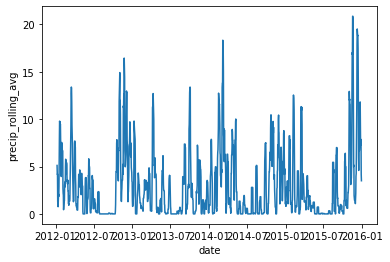

In [29]:
sns.lineplot(x='date', y='precip_rolling_avg', data=seattle)

In [30]:
seattle['temp_max'].resample('MS').last().head()

date
2012-01-01     9.4
2012-02-01     5.0
2012-03-01    10.0
2012-04-01    12.8
2012-05-01    17.8
Freq: MS, Name: temp_max, dtype: float64